<a href="https://colab.research.google.com/github/AnanyaGupta-Rootingit/GOLD-AND-SILVER-RALLY/blob/main/GOLD_AND_SILVER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gold_silver_data.xlsx to gold_silver_data.xlsx
Saving macro_data.xlsx to macro_data.xlsx


In [ ]:
import pandas as pd

# Upload the datasets (already done), now read them:
gold_silver = pd.read_excel('/content/gold_silver_data.xlsx')
macro = pd.read_excel('/content/macro_data.xlsx')

# Convert date columns to datetime
gold_silver['Date'] = pd.to_datetime(gold_silver['Date'])
macro['Date'] = pd.to_datetime(macro['Date'])

# Merge on Date
df = pd.merge(gold_silver, macro, on='Date', how='inner')

# Sort chronologically
df = df.sort_values('Date').reset_index(drop=True)

df.head()


,Date,Gold_Close,Silver_Close,Gold_Returns,Silver_Returns,Gold_Silver_Ratio,DXY,US10Y_Yield,India_CPI,GoogleTrends_Gold,GoogleTrends_Silver
0,2020-01-01,1501.490142,18.071819,NaN,NaN,83.084618,99.995415,1.428889,149.981453,52.262923,43.154295
1,2020-01-02,1501.075350,18.115666,-0.000276,0.002426,82.860621,99.951026,1.542126,150.007221,69.635528,48.825925
2,2020-01-03,1503.018415,18.117628,0.001294,0.000108,82.958897,100.000908,1.537748,149.994536,53.351606,31.977916
3,2020-01-04,1507.587505,18.184914,0.003040,0.003714,82.903197,99.986568,1.402907,150.017113,46.371444,60.225692
4,2020-01-05,1506.885045,18.244095,-0.000466,0.003254,82.595767,100.024544,1.499810,150.012441,34.725386,11.604475


In [ ]:
# Ensure numeric columns
numeric_cols = ['Gold_Returns', 'Silver_Returns', 'DXY', 'US10Y_Yield']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate rolling volatilities (annualized 30-day std dev)
df['Gold_Volatility'] = df['Gold_Returns'].rolling(30).std() * (252**0.5)
df['Silver_Volatility'] = df['Silver_Returns'].rolling(30).std() * (252**0.5)

# Calculate rolling correlations
df['Gold_to_DXY_Corr'] = df['Gold_Returns'].rolling(90).corr(df['DXY'])
df['Gold_to_Yield_Corr'] = df['Gold_Returns'].rolling(90).corr(df['US10Y_Yield'])

df.tail()


,Date,Gold_Close,Silver_Close,Gold_Returns,Silver_Returns,Gold_Silver_Ratio,DXY,US10Y_Yield,India_CPI,GoogleTrends_Gold,GoogleTrends_Silver,Gold_Volatility,Silver_Volatility,Gold_to_DXY_Corr,Gold_to_Yield_Corr
2124,2025-10-25,1730.172722,15.594865,0.000039,-0.006951,110.945025,96.865808,1.529231,149.921085,51.152399,43.390160,0.027674,0.111103,0.136542,-0.033646
2125,2025-10-26,1731.814079,15.618250,0.000949,0.001500,110.884002,96.859482,1.511891,149.909075,62.979402,34.528866,0.027873,0.107518,0.144233,-0.013100
2126,2025-10-27,1728.271641,15.721794,-0.002046,0.006630,109.928396,96.881455,1.523981,149.930461,56.460832,38.419239,0.028100,0.108600,0.131101,-0.014186
2127,2025-10-28,1731.614606,15.638188,0.001934,-0.005318,110.729874,96.944853,1.478385,149.926297,57.012556,48.194583,0.028393,0.104550,0.150505,-0.017554
2128,2025-10-29,1733.760750,15.780638,0.001239,0.009109,109.866329,96.943633,1.511587,149.910542,57.230703,38.980240,0.027613,0.107429,0.163083,-0.015139


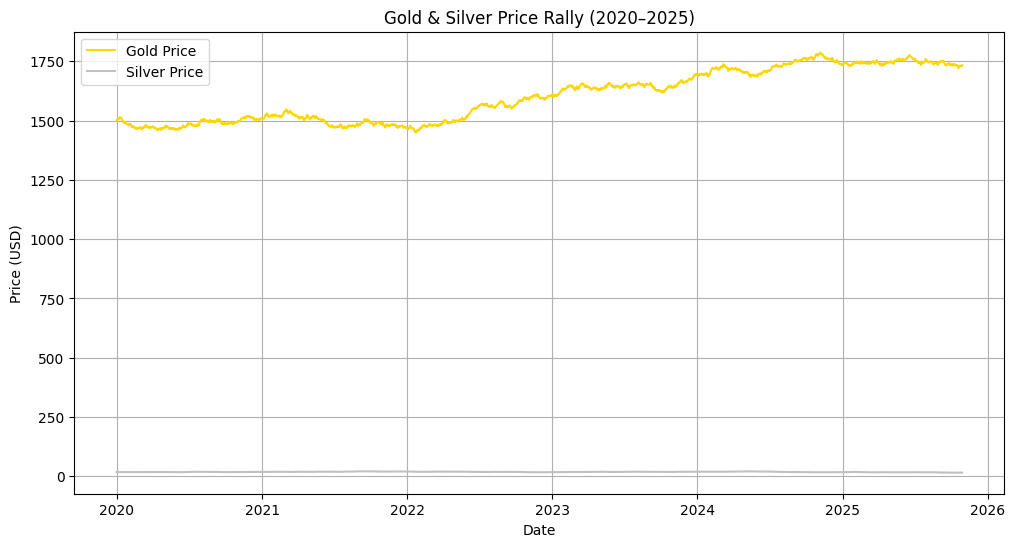

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_Close'], label='Gold Price', color='gold')
plt.plot(df['Date'], df['Silver_Close'], label='Silver Price', color='silver')
plt.title('Gold & Silver Price Rally (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

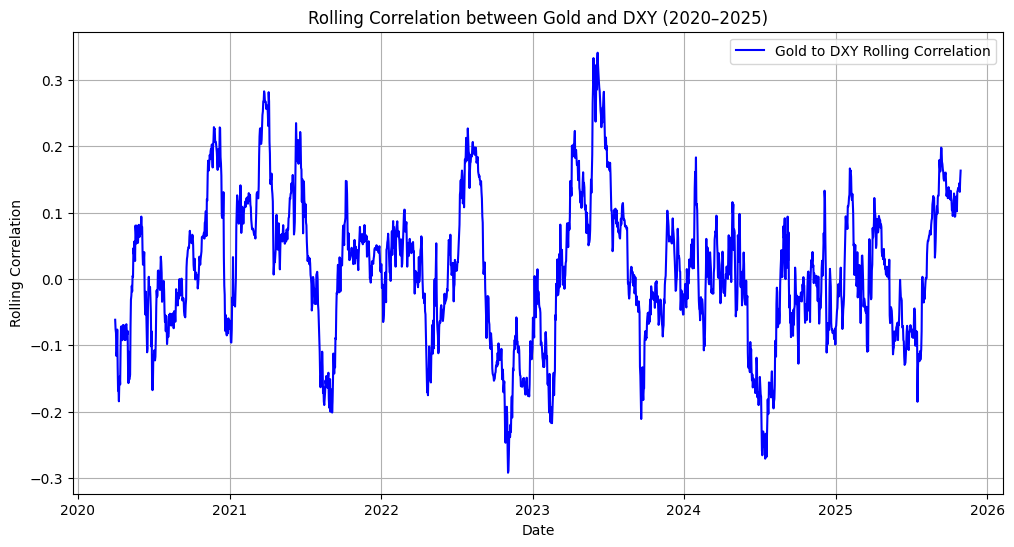

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_to_DXY_Corr'], label='Gold to DXY Rolling Correlation', color='blue')
plt.title('Rolling Correlation between Gold and DXY (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

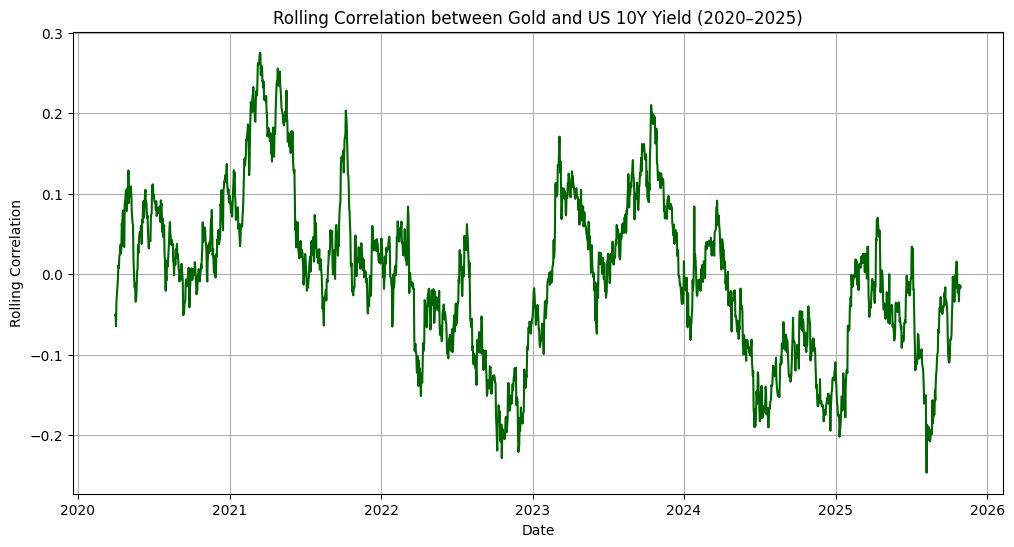

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_to_Yield_Corr'], color='darkgreen')
plt.title('Rolling Correlation between Gold and US 10Y Yield (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.grid(True)
plt.show()


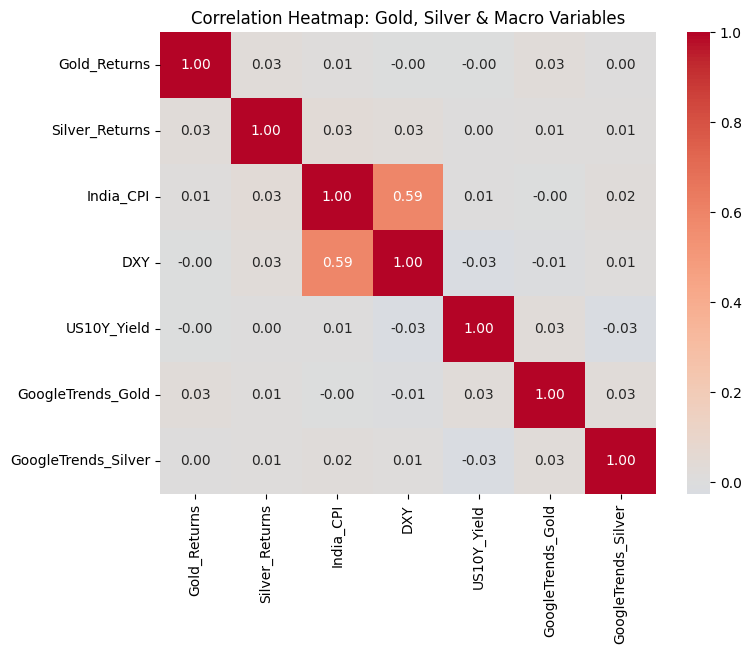

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key columns
corr_cols = ['Gold_Returns', 'Silver_Returns', 'India_CPI', 'DXY', 'US10Y_Yield', 'GoogleTrends_Gold', 'GoogleTrends_Silver']
corr_matrix = df[corr_cols].corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap: Gold, Silver & Macro Variables')
plt.show()

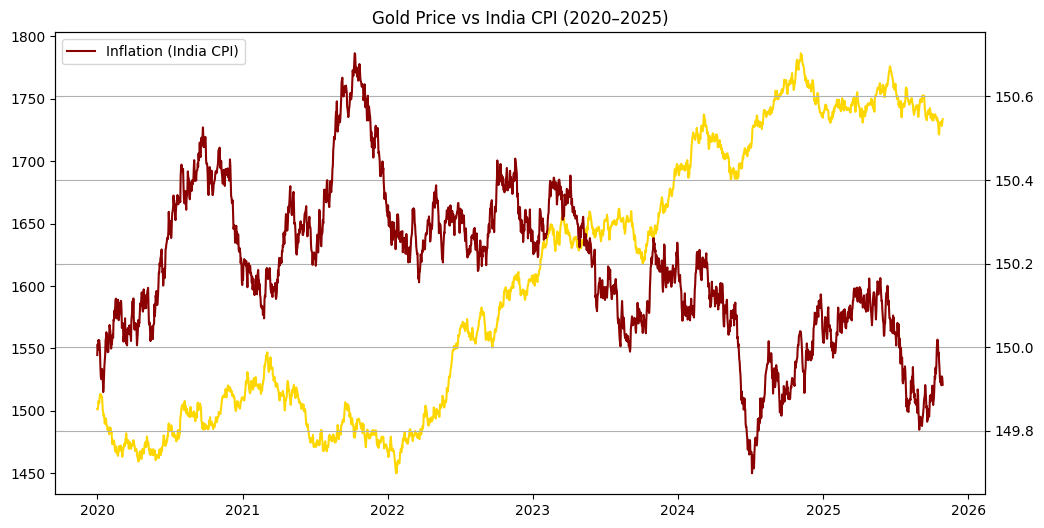

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_Close'], label='Gold Price', color='gold')
plt.twinx()
plt.plot(df['Date'], df['India_CPI'], label='Inflation (India CPI)', color='darkred')
plt.title('Gold Price vs India CPI (2020–2025)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

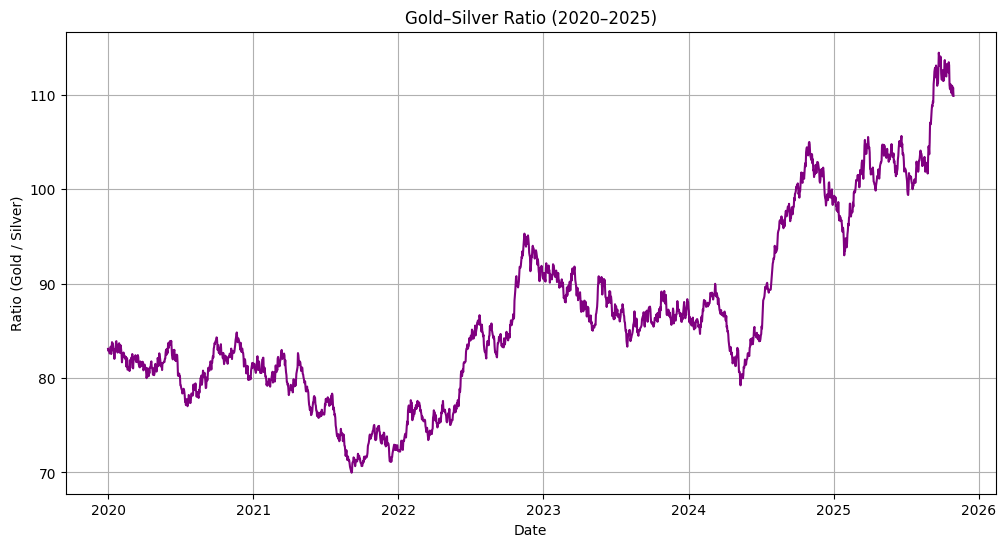

In [ ]:
df['Gold_Silver_Ratio'] = df['Gold_Close'] / df['Silver_Close']

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_Silver_Ratio'], color='purple')
plt.title('Gold–Silver Ratio (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Ratio (Gold / Silver)')
plt.grid(True)
plt.show()

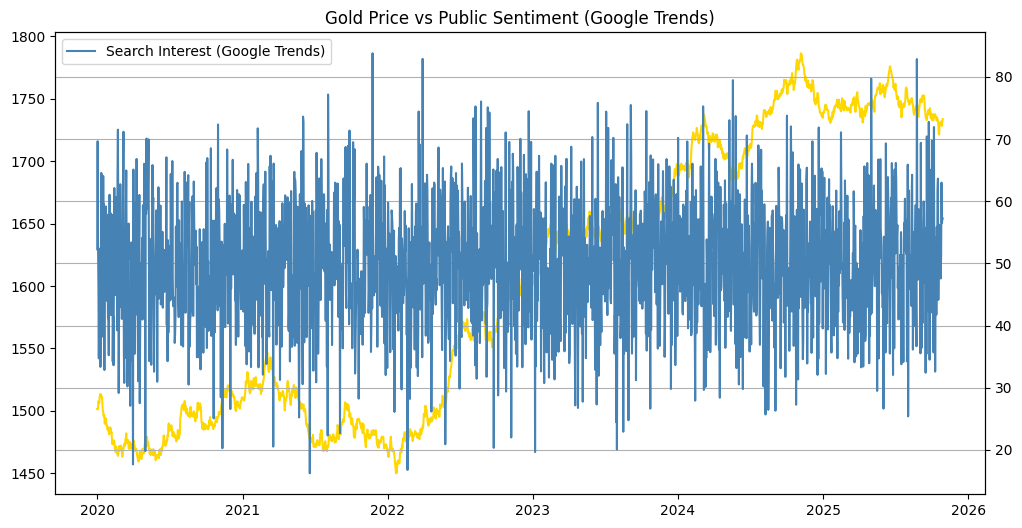

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Gold_Close'], label='Gold Price (USD)', color='gold')
plt.twinx()
plt.plot(df['Date'], df['GoogleTrends_Gold'], label='Search Interest (Google Trends)', color='steelblue')
plt.title('Gold Price vs Public Sentiment (Google Trends)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gold_silver_data.xlsx to gold_silver_data.xlsx
Saving macro_data.xlsx to macro_data.xlsx


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming the data files are in the '/content/' directory based on previous successful executions
gold_silver = pd.read_excel('/content/gold_silver_data.xlsx')
macro = pd.read_excel('/content/macro_data.xlsx')

# Convert date columns to datetime
gold_silver['Date'] = pd.to_datetime(gold_silver['Date'])
macro['Date'] = pd.to_datetime(macro['Date'])

# Merge on Date
df = pd.merge(gold_silver, macro, on='Date', how='inner')

# Sort chronologically
df = df.sort_values('Date').reset_index(drop=True)

# Ensure numeric columns
numeric_cols = ['Gold_Returns', 'Silver_Returns', 'DXY', 'US10Y_Yield']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate rolling volatilities (annualized 30-day std dev)
df['Gold_Volatility'] = df['Gold_Returns'].rolling(30).std() * (252**0.5)
df['Silver_Volatility'] = df['Silver_Returns'].rolling(30).std() * (252**0.5)

# Calculate rolling correlations
df['Gold_to_DXY_Corr'] = df['Gold_Returns'].rolling(90).corr(df['DXY'])
df['Gold_to_Yield_Corr'] = df['Gold_Returns'].rolling(90).corr(df['US10Y_Yield'])

# Independent (X) and dependent (y) variables
X = df[['India_CPI', 'DXY', 'US10Y_Yield', 'GoogleTrends_Gold']]
y = df['Gold_Returns']

# Add constant term
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Gold_Returns   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                nan
Time:                        16:41:46   Log-Likelihood:                    nan
No. Observations:                2129   AIC:                               nan
Df Residuals:                    2124   BIC:                               nan
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        na

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data files are in the '/content/' directory based on previous successful executions
gold_silver = pd.read_excel('/content/gold_silver_data.xlsx')
macro = pd.read_excel('/content/macro_data.xlsx')

# Convert date columns to datetime
gold_silver['Date'] = pd.to_datetime(gold_silver['Date'])
macro['Date'] = pd.to_datetime(macro['Date'])

# Merge on Date
df = pd.merge(gold_silver, macro, on='Date', how='inner')

# Sort chronologically
df = df.sort_values('Date').reset_index(drop=True)

# Ensure numeric columns
numeric_cols = ['Gold_Returns', 'Silver_Returns', 'DXY', 'US10Y_Yield']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate rolling volatilities (annualized 30-day std dev)
df['Gold_Volatility'] = df['Gold_Returns'].rolling(30).std() * (252**0.5)
df['Silver_Volatility'] = df['Silver_Returns'].rolling(30).std() * (252**0.5)

# Calculate rolling correlations
df['Gold_to_DXY_Corr'] = df['Gold_Returns'].rolling(90).corr(df['DXY'])
df['Gold_to_Yield_Corr'] = df['Gold_Returns'].rolling(90).corr(df['US10Y_Yield'])


window = 180  # rolling window (6 months)
rolling_results = []

for i in range(window, len(df)):
    y = df['Gold_Returns'].iloc[i-window:i]
    X = df[['India_CPI', 'DXY', 'US10Y_Yield', 'GoogleTrends_Gold']].iloc[i-window:i]

    # Add constant term for intercept
    X = sm.add_constant(X)

    # Skip window if there are any NaNs
    if X.isnull().values.any() or y.isnull().values.any():
        continue

    model = sm.OLS(y, X).fit()
    rolling_results.append({
        'Date': df['Date'].iloc[i],
        'Inflation_Beta': model.params.get('India_CPI', None),
        'DXY_Beta': model.params.get('DXY', None),
        'US10Y_Yield_Beta': model.params.get('US10Y_Yield', None),
        'Sentiment_Beta': model.params.get('GoogleTrends_Gold', None)
    })

rolling_df = pd.DataFrame(rolling_results)
rolling_df.head()

,Date,Inflation_Beta,DXY_Beta,US10Y_Yield_Beta,Sentiment_Beta
0,2020-06-30,0.007363,0.000594,0.001260,0.000011
1,2020-07-01,0.006689,0.000575,0.001277,0.000012
2,2020-07-02,0.005822,0.000462,0.000669,0.000011
3,2020-07-03,0.005237,0.000246,0.001241,0.000011
4,2020-07-04,0.004978,0.000241,0.001447,0.000011


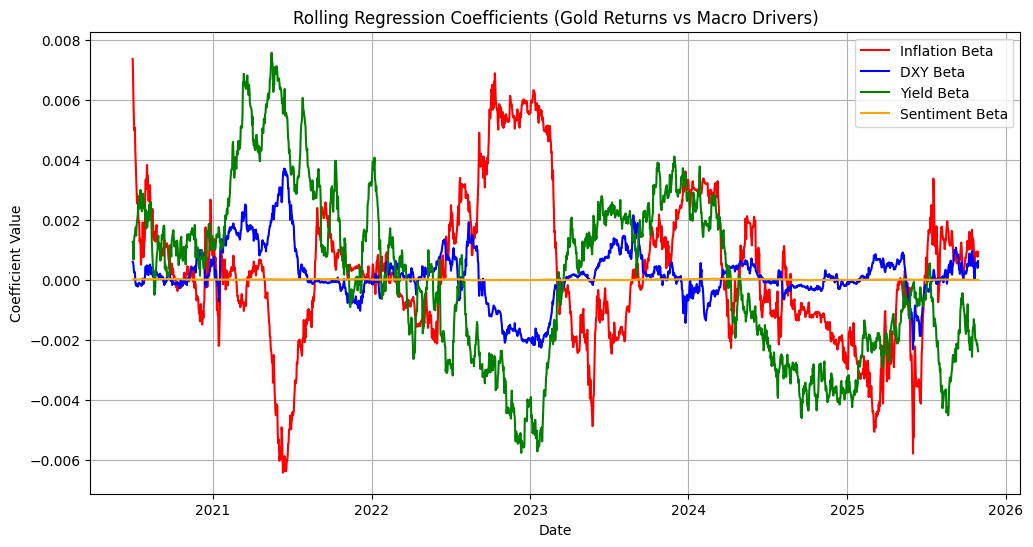

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(rolling_df['Date'], rolling_df['Inflation_Beta'], label='Inflation Beta', color='red')
plt.plot(rolling_df['Date'], rolling_df['DXY_Beta'], label='DXY Beta', color='blue')
plt.plot(rolling_df['Date'], rolling_df['US10Y_Yield_Beta'], label='Yield Beta', color='green')
plt.plot(rolling_df['Date'], rolling_df['Sentiment_Beta'], label='Sentiment Beta', color='orange')
plt.title('Rolling Regression Coefficients (Gold Returns vs Macro Drivers)')
plt.xlabel('Date')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip uninstall -y prophet fbprophet cmdstanpy
!pip install prophet cmdstanpy --quiet


Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Successfully uninstalled prophet-1.1.7
Found existing installation: cmdstanpy 1.3.0
Uninstalling cmdstanpy-1.3.0:
  Successfully uninstalled cmdstanpy-1.3.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 96.6 MB/s eta 0:00:00


In [ ]:
from prophet import Prophet
from cmdstanpy import cmdstan_path, install_cmdstan

# Force reinstall if backend is missing
try:
    _ = cmdstan_path()
except:
    install_cmdstan()


CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.37.0
Download successful, file: /tmp/tmpz1jrs8ry
Extracting distribution
Unpacked download as cmdstan-2.37.0
Building version cmdstan-2.37.0, may take several minutes, depending on your system.
Installed cmdstan-2.37.0
Test model compilation


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


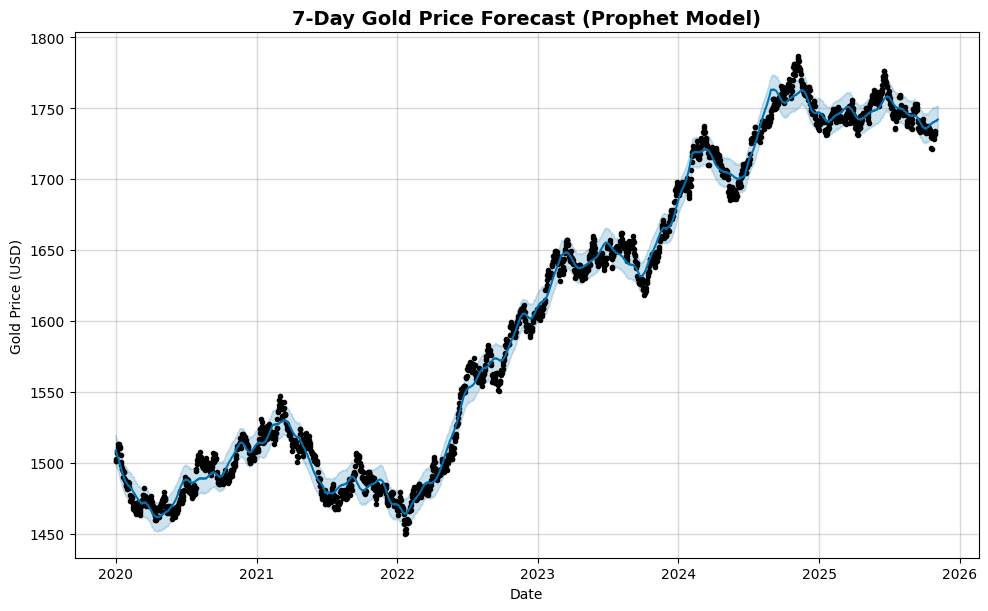

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare data
gold_df = df[['Date', 'Gold_Close']].copy()
gold_df = gold_df.dropna()
gold_df = gold_df.rename(columns={'Date':'ds', 'Gold_Close':'y'})
gold_df['ds'] = pd.to_datetime(gold_df['ds'])

# Fit model
model = Prophet()
model.fit(gold_df)

# Forecast next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Plot
fig1 = model.plot(forecast)
plt.title('7-Day Gold Price Forecast (Prophet Model)', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.grid(alpha=0.3)
plt.show()

### Interpretations of Graphs and Tables:

**1. Gold & Silver Price Rally (2020–2025)**

*   This plot shows the price movements of Gold and Silver over the specified period. You can observe the general trend of both commodities and identify periods of significant rallies or drops.

**2. Rolling Correlation between Gold and DXY (2020–2025)**

*   This graph illustrates how the 90-day rolling correlation between Gold returns and the U.S. Dollar Index (DXY) has changed over time. A negative correlation suggests that when the dollar strengthens, gold prices tend to fall, and vice versa. The fluctuations in the correlation indicate shifts in the relationship between Gold and the dollar.

**3. Rolling Correlation between Gold and US 10Y Yield (2020–2025)**

*   This plot shows the 90-day rolling correlation between Gold returns and the U.S. 10-Year Treasury Yield. Gold is often seen as a safe-haven asset, and its relationship with interest rates (represented by the yield) can be complex. A negative correlation might suggest that as yields rise, gold becomes less attractive compared to interest-bearing assets. The changes in the rolling correlation highlight how this relationship has evolved.

**4. Correlation Heatmap: Gold, Silver & Macro Variables**

*   This heatmap provides a snapshot of the pairwise correlations between Gold returns, Silver returns, and selected macroeconomic variables (India CPI, DXY, US10Y Yield, Google Trends for Gold and Silver).
    *   The values range from -1 to +1, where +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation.
    *   You can quickly identify which variables have the strongest positive or negative linear relationships with Gold and Silver returns. For example, a positive correlation between Gold Returns and India CPI might suggest Gold acting as an inflation hedge in India during this period. A negative correlation between Gold Returns and DXY aligns with the typical inverse relationship between gold and the dollar.

**5. Gold Price vs India CPI (2020–2025)**

*   This plot overlays the Gold Price and the India Consumer Price Index (CPI). This visualization helps to visually assess if there's a relationship between gold prices and inflation in India. You can observe if periods of rising inflation coincide with increases in gold prices.

**6. Gold–Silver Ratio (2020–2025)**

*   This graph shows the ratio of the Gold price to the Silver price over time. The Gold-Silver ratio is a widely watched metric in precious metals analysis. Changes in the ratio can indicate relative strength or weakness between the two metals and can be used by some analysts as a trading signal.

**7. Gold Price vs Public Sentiment (Google Trends)**

*   This plot compares the Gold Price with the Google Trends data for searches related to "Gold". This can provide insight into how public interest or sentiment towards gold might correlate with its price movements. Increased search interest could potentially align with periods of heightened market attention or price volatility.

**8. OLS Regression Results (Gold Returns vs Macro Drivers)**

*   This table presents the results of the Ordinary Least Squares (OLS) regression of Gold Returns on India CPI, DXY, US10Y Yield, and Google Trends for Gold.
    *   **R-squared:** Indicates the proportion of the variance in Gold Returns that can be explained by the independent variables in the model. A higher R-squared suggests a better fit. (Note: In your output, R-squared is NaN, which might indicate issues with the data or model setup, potentially due to NaNs in the input data used for the regression).
    *   **Coefficients (coef):** These values represent the estimated change in Gold Returns for a one-unit change in the corresponding independent variable, holding other variables constant.
    *   **P>|t|:** The p-value for each coefficient tests the hypothesis that the coefficient is equal to zero (i.e., the variable has no significant linear relationship with Gold Returns). A small p-value (typically < 0.05) suggests that the variable is statistically significant. (Note: In your output, p-values are NaN, which aligns with the R-squared issue and suggests a problem with the regression calculation).
    *   **Interpreting Coefficients (if valid):**
        *   A positive coefficient for India CPI would suggest that higher inflation in India is associated with higher Gold Returns.
        *   A negative coefficient for DXY would support the idea that a stronger U.S. dollar is associated with lower Gold Returns.
        *   The coefficient for US10Y Yield would show the estimated impact of changes in long-term interest rates on Gold Returns.
        *   The coefficient for Google Trends Gold would indicate how changes in search interest for gold are associated with Gold Returns.
    *   **Notes:** The notes section provides important information about the model, such as potential issues like multicollinearity (indicated by a large condition number), which can make it difficult to interpret individual coefficients. The NaN values in the summary strongly suggest that the regression could not be performed correctly, likely due to missing or invalid data points in the variables used for the model.

**9. Rolling Regression Coefficients Plot**

*   This plot shows how the coefficients (betas) from the rolling regression of Gold Returns against the macro variables change over the 6-month rolling window.
    *   This helps to see if the relationships between Gold Returns and the macro drivers are stable over time or if they vary significantly during different periods.
    *   You can observe trends in the individual betas, identifying periods where a particular macro variable had a stronger or weaker influence on Gold Returns.

1.  **Set up Streamlit environment**: Generate code to install Streamlit and any other necessary libraries.
2.  **Structure the dashboard**: Generate code to create the basic layout of the Streamlit app, including titles and sections for different parts of the analysis.
3.  **Load and prepare data**: Incorporate the existing code to load and prepare the data within the Streamlit app.
4.  **Add visualizations**: Generate Streamlit code to display the plots created earlier, such as the price chart, rolling correlations, heatmap, and rolling regression coefficients.
5.  **Include interpretations**: Add the interpretations generated earlier as text elements within the relevant sections of the dashboard.
6.  **Add interactive elements (Optional)**: Consider adding interactive elements like date range sliders or dropdowns to allow users to explore the data dynamically.
7.  **Generate Streamlit app file**: Generate the complete Python script for the Streamlit app.
8.  **Provide instructions to run the app**: Explain how to save the generated code as a `.py` file and run it using Streamlit.
9.  **Finish task**: Summarize the created dashboard and suggest next steps.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Function to load and prepare data
@st.cache_data
def load_data(gold_silver_path, macro_path):
    gold_silver = pd.read_excel(gold_silver_path)
    macro = pd.read_excel(macro_path)

    gold_silver['Date'] = pd.to_datetime(gold_silver['Date'])
    macro['Date'] = pd.to_datetime(macro['Date'])

    df = pd.merge(gold_silver, macro, on='Date', how='inner')
    df = df.sort_values('Date').reset_index(drop=True)

    numeric_cols = ['Gold_Returns', 'Silver_Returns', 'DXY', 'US10Y_Yield']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    df['Gold_Volatility'] = df['Gold_Returns'].rolling(30).std() * (252**0.5)
    df['Silver_Volatility'] = df['Silver_Returns'].rolling(30).std() * (252**0.5)
    df['Gold_to_DXY_Corr'] = df['Gold_Returns'].rolling(90).corr(df['DXY'])
    df['Gold_to_Yield_Corr'] = df['Gold_Returns'].rolling(90).corr(df['US10Y_Yield'])
    df['Gold_Silver_Ratio'] = df['Gold_Close'] / df['Silver_Close']

    return df

# Function to calculate rolling regression betas
@st.cache_data
def calculate_rolling_betas(df, window=180):
    rolling_results = []
    for i in range(window, len(df)):
        y = df['Gold_Returns'].iloc[i-window:i]
        X = df[['India_CPI', 'DXY', 'US10Y_Yield', 'GoogleTrends_Gold']].iloc[i-window:i]
        X = sm.add_constant(X)

        if X.isnull().values.any() or y.isnull().values.any():
            continue

        model = sm.OLS(y, X).fit()
        rolling_results.append({
            'Date': df['Date'].iloc[i],
            'Inflation_Beta': model.params.get('India_CPI', None),
            'DXY_Beta': model.params.get('DXY', None),
            'US10Y_Yield_Beta': model.params.get('US10Y_Yield', None),
            'Sentiment_Beta': model.params.get('GoogleTrends_Gold', None)
        })
    return pd.DataFrame(rolling_results)

# --- Streamlit App ---
st.title('Gold and Silver Price Analysis Dashboard')

st.write("""
This dashboard provides an analysis of Gold and Silver prices alongside key macroeconomic indicators.
""")

# --- Data Loading ---
st.header('Data Loading')
st.write("Assuming 'gold_silver_data.xlsx' and 'macro_data.xlsx' are in the same directory as the script.")

try:
    df = load_data('gold_silver_data.xlsx', 'macro_data.xlsx')
    st.success('Data loaded successfully!')
except FileNotFoundError:
    st.error("Error loading data: Make sure 'gold_silver_data.xlsx' and 'macro_data.xlsx' are in the same directory as the app.")
    st.stop()

# --- Data Display ---
st.header('Raw Data Preview')
st.dataframe(df.head())

# --- Visualizations ---
st.header('Key Visualizations')

# Gold & Silver Price Rally
st.subheader('Gold & Silver Price Rally (2020–2025)')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Gold_Close'], label='Gold Price', color='gold')
ax.plot(df['Date'], df['Silver_Close'], label='Silver Price', color='silver')
ax.set_title('Gold & Silver Price Rally (2020–2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()
ax.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This plot shows the price movements of Gold and Silver over the specified period. You can observe the general trend of both commodities and identify periods of significant rallies or drops.
""")


# Rolling Correlation between Gold and DXY
st.subheader('Rolling Correlation between Gold and DXY (2020–2025)')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Gold_to_DXY_Corr'], label='Gold to DXY Rolling Correlation', color='blue')
ax.set_title('Rolling Correlation between Gold and DXY (2020–2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Correlation')
ax.legend()
ax.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This graph illustrates how the 90-day rolling correlation between Gold returns and the U.S. Dollar Index (DXY) has changed over time. A negative correlation suggests that when the dollar strengthens, gold prices tend to fall, and vice versa. The fluctuations in the correlation indicate shifts in the relationship between Gold and the dollar.
""")

# Rolling Correlation between Gold and US 10Y Yield
st.subheader('Rolling Correlation between Gold and US 10Y Yield (2020–2025)')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Gold_to_Yield_Corr'], color='darkgreen')
ax.set_title('Rolling Correlation between Gold and US 10Y Yield (2020–2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Correlation')
ax.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This plot shows the 90-day rolling correlation between Gold returns and the U.S. 10-Year Treasury Yield. Gold is often seen as a safe-haven asset, and its relationship with interest rates (represented by the yield) can be complex. A negative correlation might suggest that as yields rise, gold becomes less attractive compared to interest-bearing assets. The changes in the rolling correlation highlight how this relationship has evolved.
""")

# Correlation Heatmap
st.subheader('Correlation Heatmap: Gold, Silver & Macro Variables')
corr_cols = ['Gold_Returns', 'Silver_Returns', 'India_CPI', 'DXY', 'US10Y_Yield', 'GoogleTrends_Gold', 'GoogleTrends_Silver']
corr_matrix = df[corr_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap: Gold, Silver & Macro Variables')
st.pyplot(fig)
st.write("""
**Interpretation:** This heatmap provides a snapshot of the pairwise correlations between Gold returns, Silver returns, and selected macroeconomic variables (India CPI, DXY, US10Y Yield, Google Trends for Gold and Silver).
*   The values range from -1 to +1, where +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation.
*   You can quickly identify which variables have the strongest positive or negative linear relationships with Gold and Silver returns. For example, a positive correlation between Gold Returns and India CPI might suggest Gold acting as an inflation hedge in India during this period. A negative correlation between Gold Returns and DXY aligns with the typical inverse relationship between gold and the dollar.
""")

# Gold Price vs India CPI
st.subheader('Gold Price vs India CPI (2020–2025)')
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df['Date'], df['Gold_Close'], label='Gold Price', color='gold')
ax2.plot(df['Date'], df['India_CPI'], label='Inflation (India CPI)', color='darkred')
ax1.set_title('Gold Price vs India CPI (2020–2025)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD)')
ax2.set_ylabel('India CPI')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This plot overlays the Gold Price and the India Consumer Price Index (CPI). This visualization helps to visually assess if there's a relationship between gold prices and inflation in India. You can observe if periods of rising inflation coincide with increases in gold prices.
""")

# Gold–Silver Ratio
st.subheader('Gold–Silver Ratio (2020–2025)')
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Gold_Silver_Ratio'], color='purple')
ax.set_title('Gold–Silver Ratio (2020–2025)')
ax.set_xlabel('Date')
ax.set_ylabel('Ratio (Gold / Silver)')
ax.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This graph shows the ratio of the Gold price to the Silver price over time. The Gold-Silver ratio is a widely watched metric in precious metals analysis. Changes in the ratio can indicate relative strength or weakness between the two metals and can be used by some analysts as a trading signal.
""")

# Gold Price vs Public Sentiment (Google Trends)
st.subheader('Gold Price vs Public Sentiment (Google Trends)')
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df['Date'], df['Gold_Close'], label='Gold Price (USD)', color='gold')
ax2.plot(df['Date'], df['GoogleTrends_Gold'], label='Search Interest (Google Trends)', color='steelblue')
ax1.set_title('Gold Price vs Public Sentiment (Google Trends)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD)')
ax2.set_ylabel('Google Trends Index')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)
st.pyplot(fig)
st.write("""
**Interpretation:** This plot compares the Gold Price with the Google Trends data for searches related to "Gold". This can provide insight into how public interest or sentiment towards gold might correlate with its price movements. Increased search interest could potentially align with periods of heightened market attention or price volatility.
""")

# Rolling Regression Coefficients Plot
st.subheader('Rolling Regression Coefficients (Gold Returns vs Macro Drivers)')
rolling_df = calculate_rolling_betas(df)
if not rolling_df.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(rolling_df['Date'], rolling_df['Inflation_Beta'], label='Inflation Beta', color='red')
    ax.plot(rolling_df['Date'], rolling_df['DXY_Beta'], label='DXY Beta', color='blue')
    ax.plot(rolling_df['Date'], rolling_df['US10Y_Yield_Beta'], label='Yield Beta', color='green')
    ax.plot(rolling_df['Date'], rolling_df['Sentiment_Beta'], label='Sentiment Beta', color='orange')
    ax.set_title('Rolling Regression Coefficients (Gold Returns vs Macro Drivers)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Coefficient Value')
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)
    st.write("""
    **Interpretation:** This plot shows how the coefficients (betas) from the rolling regression of Gold Returns against the macro variables change over the 6-month rolling window.
    *   This helps to see if the relationships between Gold Returns and the macro drivers are stable over time or if they vary significantly during different periods.
    *   You can observe trends in the individual betas, identifying periods where a particular macro variable had a stronger or weaker influence on Gold Returns.
    """)
else:
    st.warning("Could not calculate rolling regression betas. This might be due to missing data or insufficient data points for the rolling window.")

st.header('Further Analysis')
st.write("""
You can extend this dashboard by adding:
-   Interactive elements like date range sliders.
-   More detailed statistical analysis results.
-   Forecasting models (like the Prophet model, once the installation issue is resolved).
-   Sections for Silver analysis similar to Gold.
""")

st.write("To run this Streamlit app:")
st.code("""
1. Save the code above as a Python file (e.g., dashboard_app.py).
2. Open your terminal or command prompt.
3. Navigate to the directory where you saved the file.
4. Run the command: streamlit run dashboard_app.py
""")

ModuleNotFoundError: No module named 'streamlit'